In [2]:
import pandas as pd
chunk_size = 700000  # Adjust as needed
data = pd.read_csv("s3://loyalist-student/sneakers_data.csv", chunksize=chunk_size)



for chunk in data:
    data_chunk = chunk
    break




/tmp/ipykernel_26618/450009563.py:7: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in data:


In [3]:
#Creating a DataFrame
df = pd.DataFrame(data_chunk)
print(df.head())
print(len(df))

          SKU  SIZE                                     NAME  \
0  AV2187-001  10.5                Jordan 11 Retro Low 72-10   
1  DO0750-002  6.5W  Jordan 1 Low SE Sherpa Fleece (Women's)   
2  CZ0337-400   8.5        Nike Air Force 1 Low Psychic Blue   
3  DC9936-100    13             Nike SB Dunk Low Sean Cliver   
4  DH4120-100    10            Jordan 12 Retro Low Golf Taxi   

                SOLD_AT  SOLD_PRICE CONDITION  SOURCE GENDER   BRAND  \
0  2022-10-11T12:38:33Z       161.0    is_new  stockx    men  Jordan   
1  2022-10-11T12:38:35Z        92.0    is_new  stockx  women  Jordan   
2  2022-10-11T12:38:35Z       235.0    is_new  stockx    men    Nike   
3  2022-10-11T12:38:36Z       515.0    is_new  stockx    men    Nike   
4  2022-10-11T12:38:36Z       175.0    is_new  stockx    men  Jordan   

      SILHOUETTE                                       COLORWAY  RETAILPRICE  \
0  Air Jordan 11                       Black/Gym Red/White/Sail        190.0   
1   Air Jordan 1  Coll

In [4]:
#Checking the number of units sold and sorted to get the date ranges
sku_group = df.groupby("SKU")["SOLD_PRICE"].count()
sku_group_sorted =  sku_group.sort_values(ascending=False)
sku_group_sorted = pd.DataFrame(sku_group_sorted)
sku_group_sorted = sku_group_sorted.reset_index()
sku_group_sorted

,SKU,SOLD_PRICE
0,CT8527-100,3414
1,DD1391-100,3137
2,315122-111/CW2288-111,2836
3,DD1503-101,2522
4,CK9246-600,2253
...,...,...
28343,1021A257-405,1
28344,1021A258-021,1
28345,1021A258-106,1
28346,1021A272-201,1


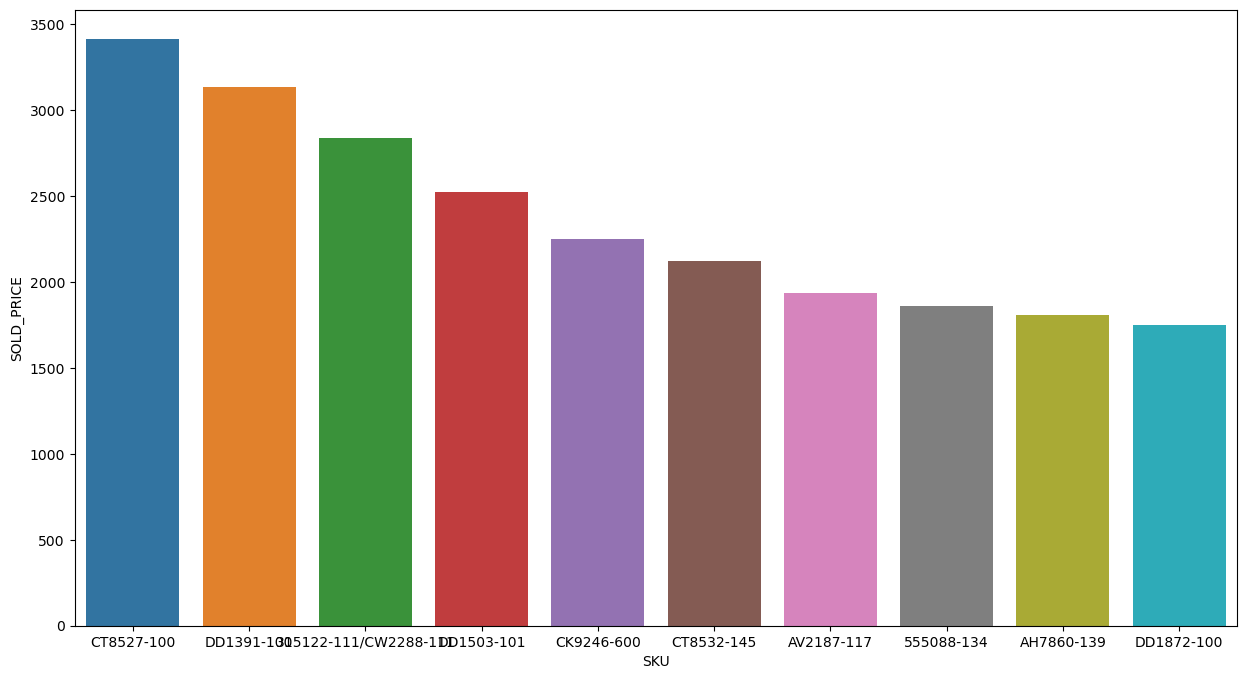

In [5]:
#plotting to see what are the most sold items

import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15,8))
# plt.bar(sku_group_sorted["SKU"][:50], sku_group_sorted["SOLD_PRICE"][:50])
sns.barplot(data = sku_group_sorted[:10], x= "SKU", y = "SOLD_PRICE")


plt.show()

In [6]:
#taking a particular sneaker to do prediction
sneaker_data = df[df["SKU"] == "CT8527-100"]
print(sneaker_data.head())
print(len(sneaker_data))

             SKU  SIZE                              NAME  \
1216  CT8527-100     9  Jordan 4 Retro White Oreo (2021)   
1570  CT8527-100     7  Jordan 4 Retro White Oreo (2021)   
3296  CT8527-100     9  Jordan 4 Retro White Oreo (2021)   
3545  CT8527-100    12  Jordan 4 Retro White Oreo (2021)   
3638  CT8527-100  11.5  Jordan 4 Retro White Oreo (2021)   

                   SOLD_AT  SOLD_PRICE CONDITION  SOURCE GENDER   BRAND  \
1216  2022-10-11T14:24:47Z       468.0    is_new  stockx    men  Jordan   
1570  2022-10-11T14:56:00Z       550.0    is_new  stockx    men  Jordan   
3296  2022-10-11T17:02:55Z       468.0    is_new  stockx    men  Jordan   
3545  2022-10-11T17:22:35Z       410.0    is_new  stockx    men  Jordan   
3638  2022-10-11T17:29:24Z       592.0    is_new  stockx    men  Jordan   

        SILHOUETTE                        COLORWAY  RETAILPRICE RELEASEDATE  \
1216  Air Jordan 4  White/Tech Grey-Black-Fire Red        190.0  2021-07-03   
1570  Air Jordan 4  White/Tech

In [7]:
# coverting Sold at to remove timestamps, we want to do it by day getting the max and min value like for stocks open and close.
#We assume that Taking regular intervals of time will not change even if it by day since the sold price is not rapidly changing.

sneaker_data["SOLD_AT"] = pd.to_datetime(sneaker_data["SOLD_AT"])
sneaker_data["SOLD_AT"] = sneaker_data["SOLD_AT"].dt.date
sneaker_data["SOLD_AT"] = pd.to_datetime(sneaker_data["SOLD_AT"])

print(sneaker_data.head())

print(len(sneaker_data))


             SKU  SIZE                              NAME    SOLD_AT  \
1216  CT8527-100     9  Jordan 4 Retro White Oreo (2021) 2022-10-11   
1570  CT8527-100     7  Jordan 4 Retro White Oreo (2021) 2022-10-11   
3296  CT8527-100     9  Jordan 4 Retro White Oreo (2021) 2022-10-11   
3545  CT8527-100    12  Jordan 4 Retro White Oreo (2021) 2022-10-11   
3638  CT8527-100  11.5  Jordan 4 Retro White Oreo (2021) 2022-10-11   

      SOLD_PRICE CONDITION  SOURCE GENDER   BRAND    SILHOUETTE  \
1216       468.0    is_new  stockx    men  Jordan  Air Jordan 4   
1570       550.0    is_new  stockx    men  Jordan  Air Jordan 4   
3296       468.0    is_new  stockx    men  Jordan  Air Jordan 4   
3545       410.0    is_new  stockx    men  Jordan  Air Jordan 4   
3638       592.0    is_new  stockx    men  Jordan  Air Jordan 4   

                            COLORWAY  RETAILPRICE RELEASEDATE IS_COLLAB  \
1216  White/Tech Grey-Black-Fire Red        190.0  2021-07-03     False   
1570  White/Tech Gre

/tmp/ipykernel_26618/2523460376.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sneaker_data["SOLD_AT"] = pd.to_datetime(sneaker_data["SOLD_AT"])
/tmp/ipykernel_26618/2523460376.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sneaker_data["SOLD_AT"] = sneaker_data["SOLD_AT"].dt.date
/tmp/ipykernel_26618/2523460376.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentat

In [8]:
#creating groupby to get max and min values on days
sneaker_group = sneaker_data.groupby("SOLD_AT")
min_max_prices = sneaker_data.groupby('SOLD_AT')['SOLD_PRICE'].agg(['min', 'max'])
result_df = sneaker_group.first().reset_index()
df_sorted = result_df.sort_values(by='SOLD_AT')
# print(df_sorted)
# print(min_max_prices)

result_df = pd.concat([df_sorted.set_index('SOLD_AT'), min_max_prices], axis=1).reset_index()

print(result_df.head())

     SOLD_AT         SKU SIZE                              NAME  SOLD_PRICE  \
0 2021-05-19  CT8527-100   15  Jordan 4 Retro White Oreo (2021)       355.0   
1 2021-05-20  CT8527-100  6.5  Jordan 4 Retro White Oreo (2021)       380.0   
2 2021-05-21  CT8527-100  6.5  Jordan 4 Retro White Oreo (2021)       380.0   
3 2021-05-22  CT8527-100   15  Jordan 4 Retro White Oreo (2021)       285.0   
4 2021-05-24  CT8527-100   15  Jordan 4 Retro White Oreo (2021)       330.0   

  CONDITION  SOURCE GENDER   BRAND    SILHOUETTE  ... RELEASEDATE  IS_COLLAB  \
0    is_new  stockx    men  Jordan  Air Jordan 4  ...  2021-07-03      False   
1    is_new  stockx    men  Jordan  Air Jordan 4  ...  2021-07-03      False   
2    is_new  stockx    men  Jordan  Air Jordan 4  ...  2021-07-03      False   
3    is_new  stockx    men  Jordan  Air Jordan 4  ...  2021-07-03      False   
4    is_new  stockx    men  Jordan  Air Jordan 4  ...  2021-07-03      False   

  COLLABORATOR  COLOR SIZE_VALUE IS_WIDE  IS

In [9]:
#from the above we can get the start and most recent date where the transaction took place, 
#so by taking start and recent date and we are creating a daterange between the period and we are reindexing the dataframe
#to get nan values for the missing dates as we have seen there are days where no transactions took place.

# Define the start and end dates
start_date = result_df["SOLD_AT"][0]
end_date = result_df["SOLD_AT"][len(result_df)-1]


date_range_index = pd.date_range(start=start_date, end=end_date, freq='D')

date_range_df = result_df.set_index("SOLD_AT").reindex(date_range_index)


print(date_range_df)

                   SKU SIZE                              NAME  SOLD_PRICE  \
2021-05-19  CT8527-100   15  Jordan 4 Retro White Oreo (2021)       355.0   
2021-05-20  CT8527-100  6.5  Jordan 4 Retro White Oreo (2021)       380.0   
2021-05-21  CT8527-100  6.5  Jordan 4 Retro White Oreo (2021)       380.0   
2021-05-22  CT8527-100   15  Jordan 4 Retro White Oreo (2021)       285.0   
2021-05-23         NaN  NaN                               NaN         NaN   
...                ...  ...                               ...         ...   
2022-10-14  CT8527-100   12  Jordan 4 Retro White Oreo (2021)       399.0   
2022-10-15  CT8527-100   11  Jordan 4 Retro White Oreo (2021)       420.0   
2022-10-16  CT8527-100   10  Jordan 4 Retro White Oreo (2021)       460.0   
2022-10-17  CT8527-100   12  Jordan 4 Retro White Oreo (2021)       363.0   
2022-10-18  CT8527-100   12  Jordan 4 Retro White Oreo (2021)       409.0   

           CONDITION  SOURCE GENDER   BRAND    SILHOUETTE  \
2021-05-19    

In [10]:
# An Assumation is made that even though there is no tranaction taken place due to the previous sold price the price remain the same
# so we are filling the date range values which has nan values with the last known value.
# if we have 10 days missing we are filling those days with previous known value.

df_filled = date_range_df.fillna(method='pad')
print(df_filled)

                   SKU SIZE                              NAME  SOLD_PRICE  \
2021-05-19  CT8527-100   15  Jordan 4 Retro White Oreo (2021)       355.0   
2021-05-20  CT8527-100  6.5  Jordan 4 Retro White Oreo (2021)       380.0   
2021-05-21  CT8527-100  6.5  Jordan 4 Retro White Oreo (2021)       380.0   
2021-05-22  CT8527-100   15  Jordan 4 Retro White Oreo (2021)       285.0   
2021-05-23  CT8527-100   15  Jordan 4 Retro White Oreo (2021)       285.0   
...                ...  ...                               ...         ...   
2022-10-14  CT8527-100   12  Jordan 4 Retro White Oreo (2021)       399.0   
2022-10-15  CT8527-100   11  Jordan 4 Retro White Oreo (2021)       420.0   
2022-10-16  CT8527-100   10  Jordan 4 Retro White Oreo (2021)       460.0   
2022-10-17  CT8527-100   12  Jordan 4 Retro White Oreo (2021)       363.0   
2022-10-18  CT8527-100   12  Jordan 4 Retro White Oreo (2021)       409.0   

           CONDITION  SOURCE GENDER   BRAND    SILHOUETTE  \
2021-05-19    

In [11]:


#finding number of days since its released.

df_filled["RELEASEDATE"] = pd.to_datetime(df_filled["RELEASEDATE"])
df_filled["Number_of_days_since_released"] = df_filled.index - df_filled["RELEASEDATE"]

df_filled["Number_of_days_since_released"] = df_filled["Number_of_days_since_released"].dt.days
print(df_filled)

                   SKU SIZE                              NAME  SOLD_PRICE  \
2021-05-19  CT8527-100   15  Jordan 4 Retro White Oreo (2021)       355.0   
2021-05-20  CT8527-100  6.5  Jordan 4 Retro White Oreo (2021)       380.0   
2021-05-21  CT8527-100  6.5  Jordan 4 Retro White Oreo (2021)       380.0   
2021-05-22  CT8527-100   15  Jordan 4 Retro White Oreo (2021)       285.0   
2021-05-23  CT8527-100   15  Jordan 4 Retro White Oreo (2021)       285.0   
...                ...  ...                               ...         ...   
2022-10-14  CT8527-100   12  Jordan 4 Retro White Oreo (2021)       399.0   
2022-10-15  CT8527-100   11  Jordan 4 Retro White Oreo (2021)       420.0   
2022-10-16  CT8527-100   10  Jordan 4 Retro White Oreo (2021)       460.0   
2022-10-17  CT8527-100   12  Jordan 4 Retro White Oreo (2021)       363.0   
2022-10-18  CT8527-100   12  Jordan 4 Retro White Oreo (2021)       409.0   

           CONDITION  SOURCE GENDER   BRAND    SILHOUETTE  \
2021-05-19    

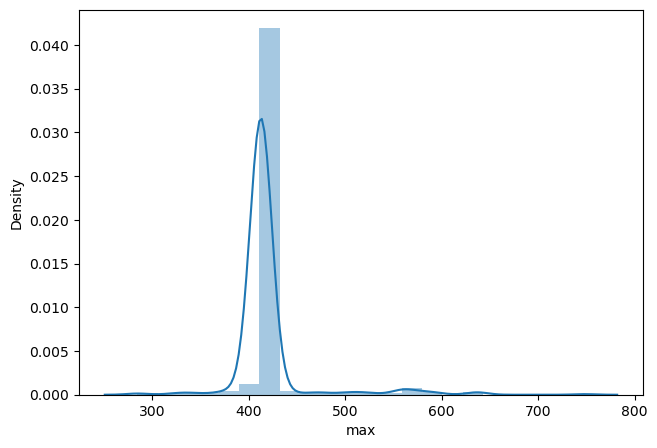

In [12]:
# provides the distributions of data with the max price 

import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df_filled["max"])
plt.show()

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

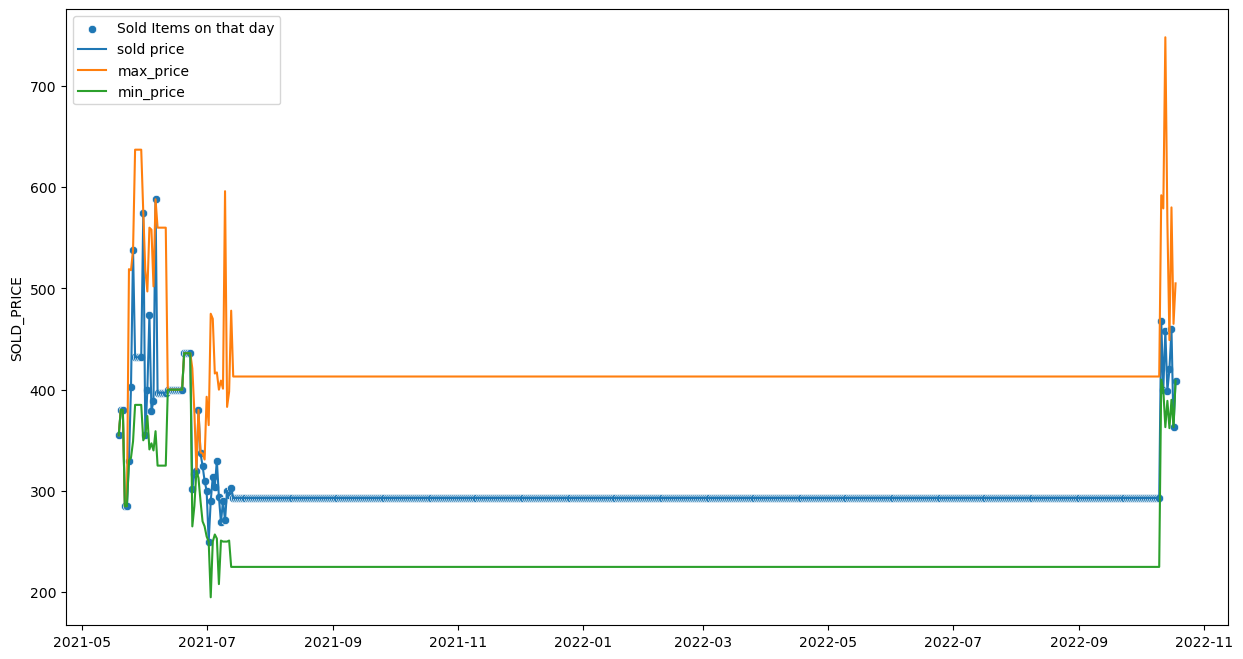

In [14]:
# provide actual sold price, max price, min price for that day, point shows the tranaction made on that day

plt.figure(figsize=(15,8))
# plt.plot(df_filled.index, df_filled["SOLD_PRICE"])
sns.scatterplot(df_filled.index, df_filled["SOLD_PRICE"], label = "Sold Items on that day")
sns.lineplot(x=df_filled.index, y='SOLD_PRICE', data=df_filled, label='sold price', )
sns.lineplot(x=df_filled.index, y='max', data=df_filled, label='max_price')
sns.lineplot(x=df_filled.index, y='min', data=df_filled, label='min_price')
plt.legend()
plt.show()

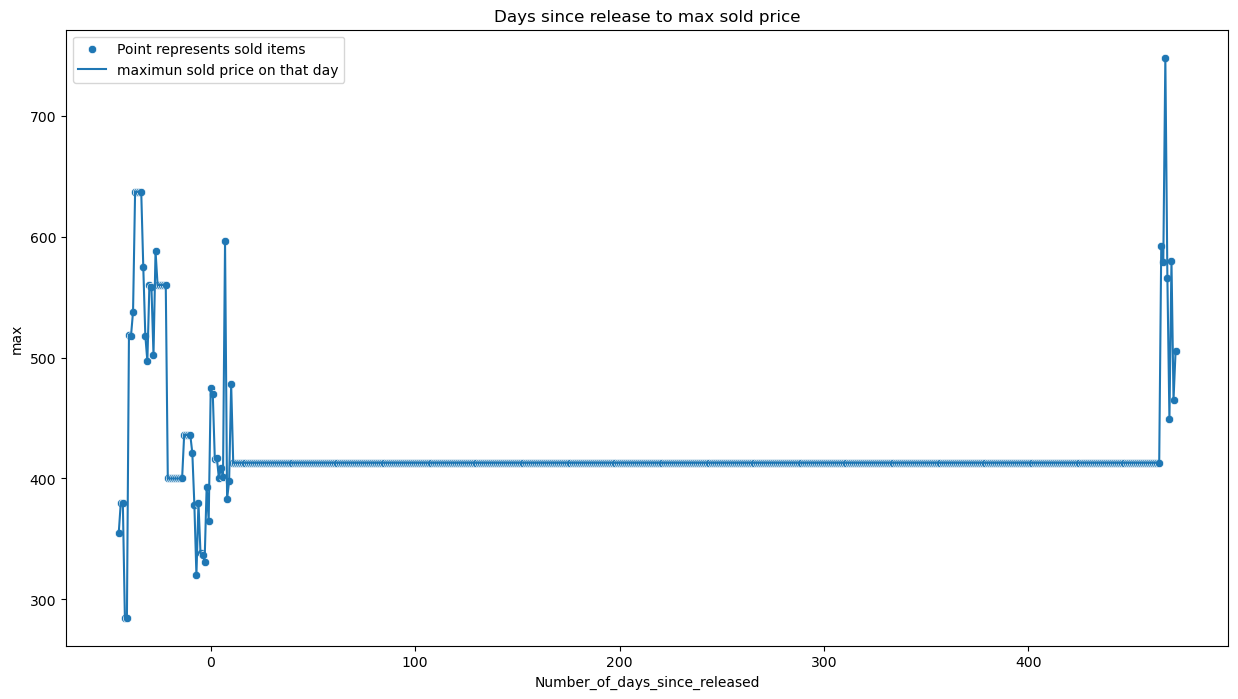

In [15]:
plt.figure(figsize=(15,8))
# plt.plot(df_filled.index, df_filled["max"])
sns.scatterplot(df_filled["Number_of_days_since_released"], df_filled["max"], label = "Point represents sold items")
sns.lineplot(x=df_filled["Number_of_days_since_released"], y='max', data=df_filled, label='maximun sold price on that day', )
# sns.lineplot(x=df_filled.index, y='max', data=df_filled, label='max_price')
# sns.lineplot(x=df_filled.index, y='min', data=df_filled, label='min_price')
plt.title("Days since release to max sold price")
plt.legend()
plt.show()

In [16]:
# creating input/ output variables

input_variables = df_filled[["SIZE", "RETAILPRICE", "min","Number_of_days_since_released", "max"]]
input_variables["SIZE"] = input_variables["SIZE"].astype(float)
output_variable = df_filled[["max"]]

# print(input_variables, output_variable)

In [17]:
from sklearn.preprocessing import StandardScaler
scalar_train = StandardScaler()
scalar_y = StandardScaler()

trans_data = scalar_train.fit_transform(input_variables)
trans_y = scalar_y.fit_transform(output_variable)

trans_df = pd.DataFrame(trans_data)
trans_df


,0,1,2,3,4
0,3.918250,0.0,2.714765,-1.728710,-1.644205
1,-0.583265,0.0,3.298474,-1.722023,-1.009594
2,-0.583265,0.0,3.298474,-1.715335,-1.009594
3,3.918250,0.0,1.080380,-1.708648,-3.421115
4,3.918250,0.0,1.080380,-1.701960,-3.421115
...,...,...,...,...,...
513,2.329480,0.0,3.508609,1.701960,3.711909
514,1.799890,0.0,2.878203,1.708648,0.741931
515,1.270300,0.0,3.531957,1.715335,4.067291
516,2.329480,0.0,2.901552,1.722023,1.148082


In [18]:
pip install  tensorflow


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam
import numpy as np

2023-12-09 08:59:26.967987: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-09 08:59:27.420480: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-09 08:59:27.420538: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-09 08:59:27.557536: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-09 08:59:27.819122: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-09 08:59:27.820934: I tensorflow/core/platform/cpu_feature_guard.cc:1

In [52]:
# we doing the same thing as before but we are taking first 6 to predict 7 price

def df_x_y(df, window_size=6):
    df_as_np = df.to_numpy()
    x = []
    y= []
    for i in range(len(df_as_np)-window_size):
        row = [a for a in df_as_np[i:i+window_size]]
        # print(f"row: {row}")
        x.append(row)
        # print(f"x: {x}")
        label = df_as_np[i+window_size][4]
        y.append(label)
    return np.array(x), np.array(y)

In [21]:

input_var, output_var = df_x_y(trans_df, window_size = 6)
print(input_var.shape, output_var.shape)

print(input_var, output_var)

(512, 6, 5) (512,)
[[[ 3.91825031  0.          2.71476477 -1.7287103  -1.64420513]
  [-0.58326466  0.          3.29847367 -1.72202283 -1.00959448]
  [-0.58326466  0.          3.29847367 -1.71533537 -1.00959448]
  [ 3.91825031  0.          1.08037983 -1.7086479  -3.42111494]
  [ 3.91825031  0.          1.08037983 -1.70196043 -3.42111494]
  [ 3.91825031  0.          2.13105586 -1.69527296  2.51884071]]

 [[-0.58326466  0.          3.29847367 -1.72202283 -1.00959448]
  [-0.58326466  0.          3.29847367 -1.71533537 -1.00959448]
  [ 3.91825031  0.          1.08037983 -1.7086479  -3.42111494]
  [ 3.91825031  0.          1.08037983 -1.70196043 -3.42111494]
  [ 3.91825031  0.          2.13105586 -1.69527296  2.51884071]
  [ 2.32948032  0.          2.20110093 -1.6885855   2.49345629]]

 [[-0.58326466  0.          3.29847367 -1.71533537 -1.00959448]
  [ 3.91825031  0.          1.08037983 -1.7086479  -3.42111494]
  [ 3.91825031  0.          1.08037983 -1.70196043 -3.42111494]
  [ 3.91825031  0

In [22]:
start = np.ceil(len(input_variables))
per_70 =  np.ceil(len(input_variables)*0.7). astype(int)
val_set = np.ceil(len(input_variables)*0.7). astype(int) + np.ceil(len(input_variables)*0.1). astype(int)

In [23]:
x_train= input_var[:per_70]
y_train= output_var[:per_70]
x_val= input_var[per_70:val_set]
y_val= output_var[per_70:val_set]
x_test=input_var[val_set:]
y_test=output_var[val_set:]

# x_train= input_variables[:per_70]
# y_train= output_variable[:per_70]
# x_val= input_variables[per_70:val_set]
# y_val= output_variable[per_70:val_set]
# x_test=input_variables[val_set:]
# y_test=output_variable[val_set:]
# test = x_train.to_numpy()
# print(test)
print(x_train)
print(y_train)
print(x_test)
print(y_test)
print(x_val)
print(y_val)

[[[ 3.91825031  0.          2.71476477 -1.7287103  -1.64420513]
  [-0.58326466  0.          3.29847367 -1.72202283 -1.00959448]
  [-0.58326466  0.          3.29847367 -1.71533537 -1.00959448]
  [ 3.91825031  0.          1.08037983 -1.7086479  -3.42111494]
  [ 3.91825031  0.          1.08037983 -1.70196043 -3.42111494]
  [ 3.91825031  0.          2.13105586 -1.69527296  2.51884071]]

 [[-0.58326466  0.          3.29847367 -1.72202283 -1.00959448]
  [-0.58326466  0.          3.29847367 -1.71533537 -1.00959448]
  [ 3.91825031  0.          1.08037983 -1.7086479  -3.42111494]
  [ 3.91825031  0.          1.08037983 -1.70196043 -3.42111494]
  [ 3.91825031  0.          2.13105586 -1.69527296  2.51884071]
  [ 2.32948032  0.          2.20110093 -1.6885855   2.49345629]]

 [[-0.58326466  0.          3.29847367 -1.71533537 -1.00959448]
  [ 3.91825031  0.          1.08037983 -1.7086479  -3.42111494]
  [ 3.91825031  0.          1.08037983 -1.70196043 -3.42111494]
  [ 3.91825031  0.          2.131055

In [26]:
# we have taken 4 columns into consideration that might effect the pricing so input layer has 4
# we did some experiments with 64 and 256 to see how the model perform we think 128 provides better results for us.
#We are using drop out to reduce the overfitting since its randomly drops 20% of the nodes.

model2 = Sequential()
model2.add(Input((6,5)))
model2.add(layers.LSTM(128))
model2.add(layers.Dropout(0.2))
model2.add(layers.Dense(8, 'relu'))
model2.add(layers.Dense(1, 'linear'))
model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 128)               68608     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense (Dense)               (None, 8)                 1032      
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 69649 (272.07 KB)
Trainable params: 69649 (272.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [27]:
# each timea model is run, we are  saving the best model with low loss, rmse

cp = ModelCheckpoint('model2/', save_best_only=True)
model2.compile(loss=MeanSquaredError(),  optimizer = Adam(learning_rate = 0.001), metrics = [RootMeanSquaredError()])

In [28]:
# epochs are 500, it see the entire dataset that is selected 500 times

model2.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=150, callbacks=[cp])

Epoch 1/150
10/12 [========================>.....] - ETA: 0s - loss: 0.9339 - root_mean_squared_error: 0.9664INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


12/12 [==============================] - 6s 384ms/step - loss: 0.8654 - root_mean_squared_error: 0.9303 - val_loss: 7.3119e-05 - val_root_mean_squared_error: 0.0086
Epoch 2/150
12/12 [==============================] - 0s 12ms/step - loss: 0.6450 - root_mean_squared_error: 0.8031 - val_loss: 5.4776e-04 - val_root_mean_squared_error: 0.0234
Epoch 3/150
12/12 [==============================] - 0s 15ms/step - loss: 0.4681 - root_mean_squared_error: 0.6842 - val_loss: 3.6666e-04 - val_root_mean_squared_error: 0.0191
Epoch 4/150
12/12 [==============================] - 0s 16ms/step - loss: 0.4192 - root_mean_squared_error: 0.6475 - val_loss: 1.2350e-04 - val_root_mean_squared_error: 0.0111
Epoch 5/150
12/12 [==============================] - 0s 14ms/step - loss: 0.3505 - root_mean_squared_error: 0.5921 - val_loss: 3.5852e-04 - val_root_mean_squared_error: 0.0189
Epoch 6/150
12/12 [==============================] - 0s 16ms/step - loss: 0.3662 - root_mean_squared_error: 0.6052 - val_loss: 6.06

INFO:tensorflow:Assets written to: model2/assets


12/12 [==============================] - 3s 306ms/step - loss: 0.2145 - root_mean_squared_error: 0.4632 - val_loss: 6.7918e-05 - val_root_mean_squared_error: 0.0082
Epoch 20/150
 7/12 [================>.............] - ETA: 0s - loss: 0.2055 - root_mean_squared_error: 0.4533INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


12/12 [==============================] - 3s 279ms/step - loss: 0.1635 - root_mean_squared_error: 0.4044 - val_loss: 5.5212e-05 - val_root_mean_squared_error: 0.0074
Epoch 21/150
 7/12 [================>.............] - ETA: 0s - loss: 0.2250 - root_mean_squared_error: 0.4743INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


12/12 [==============================] - 3s 267ms/step - loss: 0.1943 - root_mean_squared_error: 0.4408 - val_loss: 3.4182e-05 - val_root_mean_squared_error: 0.0058
Epoch 22/150
12/12 [==============================] - 0s 11ms/step - loss: 0.1980 - root_mean_squared_error: 0.4450 - val_loss: 7.3255e-04 - val_root_mean_squared_error: 0.0271
Epoch 23/150
12/12 [==============================] - 0s 10ms/step - loss: 0.1903 - root_mean_squared_error: 0.4363 - val_loss: 2.8294e-04 - val_root_mean_squared_error: 0.0168
Epoch 24/150
 8/12 [===================>..........] - ETA: 0s - loss: 0.0960 - root_mean_squared_error: 0.3099INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


12/12 [==============================] - 3s 281ms/step - loss: 0.1808 - root_mean_squared_error: 0.4252 - val_loss: 1.7255e-06 - val_root_mean_squared_error: 0.0013
Epoch 25/150
 7/12 [================>.............] - ETA: 0s - loss: 0.0871 - root_mean_squared_error: 0.2951INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


12/12 [==============================] - 3s 239ms/step - loss: 0.1623 - root_mean_squared_error: 0.4028 - val_loss: 2.5159e-07 - val_root_mean_squared_error: 5.0158e-04
Epoch 26/150
12/12 [==============================] - 0s 12ms/step - loss: 0.2021 - root_mean_squared_error: 0.4496 - val_loss: 1.3004e-04 - val_root_mean_squared_error: 0.0114
Epoch 27/150
12/12 [==============================] - 0s 14ms/step - loss: 0.1654 - root_mean_squared_error: 0.4067 - val_loss: 7.9526e-06 - val_root_mean_squared_error: 0.0028
Epoch 28/150
12/12 [==============================] - 0s 11ms/step - loss: 0.1568 - root_mean_squared_error: 0.3959 - val_loss: 5.6531e-05 - val_root_mean_squared_error: 0.0075
Epoch 29/150
12/12 [==============================] - 0s 11ms/step - loss: 0.1817 - root_mean_squared_error: 0.4263 - val_loss: 2.6273e-07 - val_root_mean_squared_error: 5.1257e-04
Epoch 30/150
12/12 [==============================] - 0s 12ms/step - loss: 0.1569 - root_mean_squared_error: 0.3961 - v

In [29]:
from tensorflow.keras.models import load_model

model = load_model('model2/')

In [30]:
train_prediction = model.predict(x_train)
train_prediction

actual_pred = scalar_y.inverse_transform(train_prediction)
train_pred = actual_pred.flatten()
# print(train_pred)

real_pred = scalar_y.inverse_transform([y_train])
y_trainpred = real_pred.flatten()
# print(y_trainpred)

train_results = pd.DataFrame(data = {"Train Prediction" :train_pred, 'actuals' : y_trainpred})
train_results
# actual_pred

12/12 [==============================] - 0s 4ms/step


,Train Prediction,actuals
0,472.231689,518.0
1,553.453186,538.0
2,603.274719,637.0
3,639.026550,637.0
4,646.117920,637.0
...,...,...
358,413.044922,413.0
359,413.043732,413.0
360,413.042542,413.0
361,413.041351,413.0


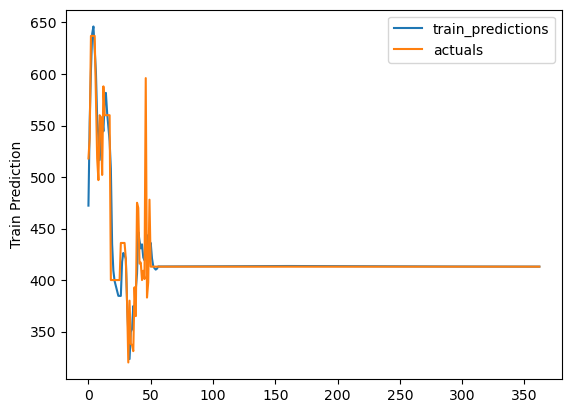

In [31]:

sns.lineplot(x=train_results.index, y='Train Prediction', data=train_results, label='train_predictions' )
sns.lineplot(x=train_results.index, y='actuals', data=train_results, label='actuals')
# plt.plot(train_results["Train Prediction"][:100], color='green')
# plt.plot(train_results["actuals"][:100], color='orange')
plt.legend()
plt.show()

In [32]:
#challenges we had, Data is irregular, we donot have transactions all the time to predict as a timeseries. 
#We used pad from numpy numpy to fill the missing values.
#we Tried different ways to predict the sold_price, once being a rolling mean and sliding window where we only used sold price as an input vaiable to predict the next sold price, 
#even though we have large errors we still able to predict and get 30 to 40 dolars less or more than the actuals,
# we might not be able to use it as an accurate prediction but we should be able to provide customer an general direction of the price.
# Business can provide these insights to customers to drive them to a particular sneaker and drive up or down the price.

In [33]:
test_prediction = model.predict(x_test)
# print(test_prediction)
xtest_pred = scalar_y.inverse_transform(test_prediction)
test_pred = xtest_pred.flatten()
# print(test_pred)

ytest_pred = scalar_y.inverse_transform([y_test])

y_testpred = ytest_pred.flatten()

test_results = pd.DataFrame(data = {"Test Prediction" :test_pred, 'Test actuals' : y_testpred})
test_results

4/4 [==============================] - 0s 4ms/step


,Test Prediction,Test actuals
0,412.995972,413.0
1,412.995422,413.0
2,412.994904,413.0
3,412.994385,413.0
4,412.993866,413.0
...,...,...
92,530.401672,566.0
93,533.022034,449.0
94,488.526917,580.0
95,511.728821,465.0


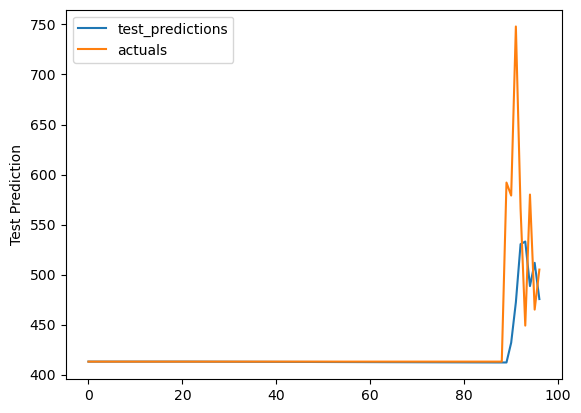

In [34]:
sns.lineplot(x=test_results.index, y='Test Prediction', data=test_results, label='test_predictions', )
sns.lineplot(x=test_results.index, y='Test actuals', data=test_results, label='actuals')
# plt.plot(train_results["Train Prediction"][:100], color='green')
# plt.plot(train_results["actuals"][:100], color='orange')
plt.legend()
plt.show()


In [35]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(test_results['Test actuals'], test_results["Test Prediction"])
print(mse)

1543.7838821624089


In [62]:

testing = {"data": [{"Date":'2025-10-11',"SIZE":9, "RETAILPRICE":190, "min":200,  "Number_of_days_since_released":800, "max":600},
                   {"Date":'2025-10-12',"SIZE":10, "RETAILPRICE":190, "min":400,  "Number_of_days_since_released":800, "max":800}]}
#                    {"Date":'2025-10-13',"SIZE":9, "RETAILPRICE":190, "min":600,  "Number_of_days_since_released":800, "max":1000},
#                    {"Date":'2025-10-14',"SIZE":8, "RETAILPRICE":190, "min":300,  "Number_of_days_since_released":800, "max":600},
#                    {"Date":'2025-10-15',"SIZE":5, "RETAILPRICE":190, "min":400,  "Number_of_days_since_released":800, "max":500},
#                    {"Date":'2025-10-16',"SIZE":7, "RETAILPRICE":190, "min":400,  "Number_of_days_since_released":800, "max":600},
#                    {"Date":'2025-10-17',"SIZE":7, "RETAILPRICE":190, "min":400,  "Number_of_days_since_released":800, "max":600}]}
data_list = testing["data"]
dfs = [pd.DataFrame(item, index=[pd.to_datetime(item["Date"])]) for item in data_list]
testing = pd.concat(dfs)
testing.drop("Date", axis=1, inplace=True)
print(testing.info())

# testing = {"Date":'2025-10-11',"SIZE":9, "RETAILPRICE":190, "min":200,  "Number_of_days_since_released":800, "max":600}

# # Convert the dictionary to a DataFrame
# testing = pd.DataFrame(testing, index=[pd.to_datetime(testing["Date"])])

# Drop the 'Date' column as it's now the index
# testing.drop("Date", axis=1, inplace=True)

# Display the resulting DataFrame
print(testing)


one_data = scalar_train.transform(testing)
# print(one_data)

one_data = pd.DataFrame(one_data)
# print(one_data)

in_v , out_v = df_x_y(one_data, window_size=1)

print(in_v, out_v)

# window_size = 5
# df_as_np1 = one_data.to_numpy()
# print(len(df_as_np1)-window_size)
# x = []
# y= []
# for i in range(len(df_as_np1)-window_size):
#     print(i)
#     row = [a for a in df_as_np1[i:i+window_size]]
#     print(f"row: {row}")
#     x.append(row)
#     print(f"x: {x}")
#     label = df_as_np1[i+window_size][4]
#     y.append(label)


# print(x)
# print(y)

# print(input_var)
# input_data = input_var[:, :, :]
# output_data = output_var[:]

# input_data

check_prediction = model.predict(in_v)
print(check_prediction)

one_pred = scalar_y.inverse_transform(check_prediction).flatten()
oneout_pred = scalar_y.inverse_transform([out_v]).flatten()
test_results = pd.DataFrame(data = {"Test Prediction" :one_pred, 'Test actuals' : oneout_pred})
test_results

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2 entries, 2025-10-11 to 2025-10-12
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   SIZE                           2 non-null      int64
 1   RETAILPRICE                    2 non-null      int64
 2   min                            2 non-null      int64
 3   Number_of_days_since_released  2 non-null      int64
 4   max                            2 non-null      int64
dtypes: int64(5)
memory usage: 96.0 bytes
None
            SIZE  RETAILPRICE  min  Number_of_days_since_released  max
2025-10-11     9          190  200                            800  600
2025-10-12    10          190  400                            800  800
[[[ 0.74071033  0.         -0.90423045  3.92219958  4.5749792 ]]] [9.65186437]
1/1 [==============================] - 0s 22ms/step
[[0.1627909]]


,Test Prediction,Test actuals
0,426.185211,800.0
